## Import Libriaries

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Read in the fuel data

In [71]:
# The fuel data url was read in and converted to data.csv
fuel_data = pd.read_csv('data.csv')

In [72]:
fuel_data.head().T

,0,1,2,3,4
record_id,f1_fuel_1994_12_1_0_7,f1_fuel_1994_12_1_0_10,f1_fuel_1994_12_2_0_1,f1_fuel_1994_12_2_0_7,f1_fuel_1994_12_2_0_10
utility_id_ferc1,1,1,2,2,2
report_year,1994,1994,1994,1994,1994
plant_name_ferc1,rockport,rockport total plant,gorgas,barry,chickasaw
fuel_type_code_pudl,coal,coal,coal,coal,gas
fuel_unit,ton,ton,ton,ton,mcf
fuel_qty_burned,5.37749e+06,1.04869e+07,2.97868e+06,3.73948e+06,40533
fuel_mmbtu_per_unit,16.59,16.592,24.13,23.95,1
fuel_cost_per_unit_burned,18.59,18.58,39.72,47.21,2.77
fuel_cost_per_unit_delivered,18.53,18.53,38.12,45.99,2.77


### Question 1

In [4]:
A = [1,2,3,4,5,6]
B = [13, 21, 34]

A.extend(B)

print(A)

[1, 2, 3, 4, 5, 6, 13, 21, 34]


## Question 2

**How do you create an identity matrix in python?**

In [5]:
print(np.identity(3))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


## Question 3

**Which of the following fuel type code has the lowest average fuel cost per unit burned?**

In [98]:
df = fuel_data[['fuel_type_code_pudl', 'fuel_cost_per_unit_burned']]
fuel_types = fuel_data['fuel_type_code_pudl'].unique()

low_average = pd.Series()

for i in range(6):
    print(df[fuel_data['fuel_type_code_pudl']  == fuel_types[i]].mean())
    low_average = low_average.append(df[fuel_data['fuel_type_code_pudl'] == fuel_types[i]].mean())
    

# create a dataframe    
low_average = low_average.to_frame()
low_average.set_index(fuel_types, inplace=True)
low_average.columns=['lowest average fuel cost per unit burned']
low_average


C:\Users\SEGUN\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


fuel_cost_per_unit_burned    67.42183
dtype: float64
fuel_cost_per_unit_burned    13.659397
dtype: float64
fuel_cost_per_unit_burned    4955.157002
dtype: float64
fuel_cost_per_unit_burned    168.877086
dtype: float64
fuel_cost_per_unit_burned    19.518122
dtype: float64
fuel_cost_per_unit_burned    18.253856
dtype: float64


,lowest average fuel cost per unit burned
coal,67.421830
gas,13.659397
nuclear,4955.157002
oil,168.877086
waste,19.518122
other,18.253856


## Question 4

**What is the standard deviation and 75th percentile of the measure of energy per unit (Fuel_mmbtu_per_unit) in two decimal places?**

In [101]:
measure_per_unit = fuel_data.describe()['fuel_mmbtu_per_unit']

In [102]:
print(f'The std is:%.2f' % measure_per_unit[2])
print('\n')
print(f'The 75th percentile is: {measure_per_unit[6].round(2)}')

The std is:10.60


The 75th percentile is: 17.01


## Question 5

**What is the skewness and kurtosis for the fuel quantity burned in two decimal places?**

In [79]:
print(f'The Skew is:{fuel_data.skew()[2].round(2)}')
print('\n')
print(f'The Kurtosis is:{fuel_data.kurtosis()[2].round(2)}')

The Skew is:15.85


The Kurtosis is:651.37


## Question 6

**Which feature has missing values and what is the total number of missing value and percentage of the missing rows as a factor of the total number of rows in three decimal places?**

(Enter answer in the format: Feature: xxx, Total: xxx, Percent: xxx)


#### Answer: Feature: fuel_unit, Total: 180, Percent: 0.61)

## Question 7

**The feature with missing values falls under what category? What missing value imputation technique would you use?**

#### Answer: Categorical and mode inputation

## Question 8

**Which of the features has the second and third lowest correlation with the Fuel Cost Per Unit Burned?**

In [82]:
fuel_data.corr().loc['fuel_cost_per_unit_burned'].sort_values(ascending=True)


utility_id_ferc1               -0.037863
fuel_qty_burned                -0.018535
fuel_mmbtu_per_unit            -0.010034
fuel_cost_per_mmbtu            -0.000437
fuel_cost_per_unit_delivered    0.011007
report_year                     0.013599
fuel_cost_per_unit_burned       1.000000
Name: fuel_cost_per_unit_burned, dtype: float64

#### Answer: fuel_qty_burned, fuel_mmbtu_per_unit

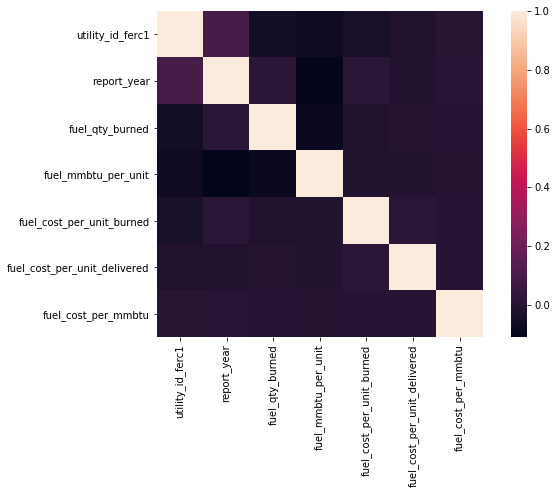

In [85]:
# let's visualize the two lowest features using heatmap
corrmat = fuel_data.corr()

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corrmat, square=True);

## Question 9

**For the fuel type coal, what is the percentage change in the fuel cost per unit burned in 1998 compared to 1994?**

In [96]:
fuel_type_code_unique = fuel_data.groupby(['report_year', 'fuel_type_code_pudl'])['fuel_cost_per_unit_burned'].sum()

year_1994, year_1998 = fuel_type_code_unique.loc[[1994, 1998], 'coal']

# Find percentage change
perc_change = ((1994 - 1998) / 1994) * 100

print(perc_change)

-0.20060180541624875


## Question 10

**Which year has the highest average fuel cost per unit delivered?**

#### Answer: 1997

In [97]:
fuel_data.groupby('report_year')['fuel_cost_per_unit_delivered'].mean().sort_values(ascending=True)


report_year
1999       25.551627
1995       32.735269
2006       38.657484
2005       41.438184
2007       43.325023
2017       46.196861
2002       47.594361
2003       55.663493
2008       58.588197
2011       59.774667
2001       60.050396
2012       60.994502
1994       63.636060
2010       91.862105
2016      103.901761
2004      139.524275
2013      172.307591
2014      192.737183
1998      287.154420
2015      326.535511
2018      499.269966
2009      652.694163
2000      985.362877
1996     9196.705948
1997    11140.197239
Name: fuel_cost_per_unit_delivered, dtype: float64